In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x=y=np.arange(-1.0, 1.0, 0.05)
X, Y=np.meshgrid(x, y)
Z=-(1/3)*(X**2)*(np.exp(Y))

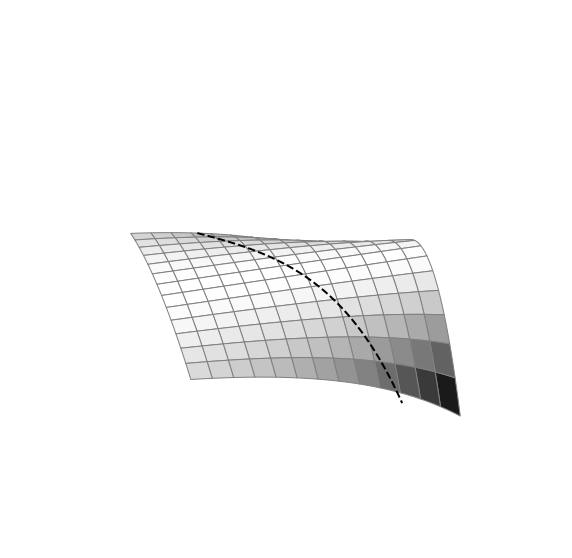

In [ ]:
t=np.linspace(-0.5, 0.5, 100)
xt=np.array(2*t)
yt=np.array(t)
zt=-(1/3)*(xt**2)*(np.exp(yt))

fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=3, cstride=3,
                cmap=plt.cm.gray, edgecolor='gray', zorder=1)
ax.plot3D(xt, yt, zt, '--', lw=2, color='k', zorder=10)

ax.set_zlim(-1, 1)
ax.set_axis_off()
ax.view_init(35, -15)

plt.show()

In [ ]:
import sympy as sp

x1=sp.Symbol('x1')
x2=sp.Symbol('x2')

f=-sp.Rational(1, 3)*x1**2*sp.E**x2
sp.derive_by_array(sp.derive_by_array(f, (x1, x2)), (x1, x2))


[[-2*exp(x2)/3, -2*x1*exp(x2)/3], [-2*x1*exp(x2)/3, -x1**2*exp(x2)/3]]

In [ ]:
H=sp.derive_by_array(sp.derive_by_array(f, (x1, x2)), (x1, x2))
H.subs({x1:2, x2:0})

[[-2/3, -4/3], [-4/3, -4/3]]

In [ ]:
x=sp.Symbol('x')
y=sp.Symbol('y')

f=50*(y-x**2)**2 + (2-x)**2

c=sp.derive_by_array(f, (x, y))
Hf=sp.derive_by_array(c, (x, y))
c
Hf

[[600*x**2 - 200*y + 2, -200*x], [-200*x, 100]]

In [ ]:
first_ncs_sol=sp.solve(c)
first_ncs_sol

[{x: 2, y: 4}]

In [ ]:
H=Hf.subs({x: first_ncs_sol[0][x], y: first_ncs_sol[0][y]})
H

[[1602, -400], [-400, 100]]

In [ ]:
H=np.array(H).astype(np.float64).reshape(2, 2)
lamda, _ = np.linalg.eig(H)
lamda

array([1.70188248e+03, 1.17516927e-01])

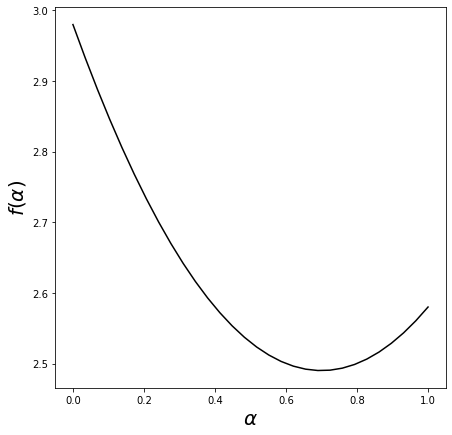

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(7, 7))
ax=fig.add_subplot(1, 1, 1)

def f(X):
  return X[0]**2 + X[1]**2 + 2

x_0=np.array([0.7, 0.7])
d=np.array([-1, 0])

def f_alpha(a):
  return f(x_0.reshape(2, 1) + a*d.reshape(2, 1))

alphas=np.linspace(0, 1, 30)
ax.plot(alphas, f_alpha(alphas), 'k')
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$f(\alpha)$', fontsize=20)

plt.show()

In [3]:
def f1(X):
  return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
  dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
  dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
  return np.array([dx0, dx1])

def f2(X):
  return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
  dx0=-200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
  dx1=100*(X[1]-X[0]**2)
  return np.array([dx0, dx1])

In [4]:
from scipy.optimize import line_search

x=np.array([0, 4.5])

def SDM(f, df, x, eps=1.0e-7, callback=None):
  max_iter=10000

  for k in range(max_iter):
    c=df(x)

    if np.linalg.norm(c)<eps:
      print("Stop criterion break Iter.: {:5d}, x: {}".format(k, x))
      break
    d=-c

    alpha=line_search(f, df, x, d)[0]
    x=x+alpha*d

    if callback:
      callback(x)
  else:
    print("Stop max Iter.: {:5d} x: {}".format(k, x))

SDM(f1, df1, x)

Stop criterion break Iter.:    61, x: [0.99999997 3.00000002]


In [5]:
x=np.array([-1, -2])
SDM(f2, df2, x)

Stop max Iter.:  9999 x: [1.98408211 3.93652431]


In [6]:
x=np.array([0, 4.5])

def CGM(f, df, x, eps=1.0e-7, callback=None):
  max_iter=10000

  for k in range(max_iter):
    c=df(x)

    if np.linalg.norm(c)<eps:
      print("Stop criterion break Iter.: {:5d}, x: {}".format(k, x))
      break
    if k ==0:
      d=-c
    else:
      beta=(np.linalg.norm(c)/np.linalg.norm(c_old))**2
      d=-c+beta*d
    
    alpha=line_search(f, df, x, d, c2=0.1)[0]

    x=x+alpha*d

    c_old=c.copy()

    if callback:
      callback(x)
  else:
    print("Stop max iter: {:5d}, x:{}".format(k, x))

CGM(f1, df1, x)

Stop criterion break Iter.:     2, x: [1. 3.]


In [7]:
x=np.array([-1, 2])
CGM(f2, df2, x)

Stop criterion break Iter.:    89, x: [1.99999993 3.99999972]


In [9]:
from scipy import optimize

x=np.array([-1, 2])
result_scipy=optimize.fmin_cg(f2, x)
result_scipy

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 296
         Gradient evaluations: 74


array([1.99999254, 3.99997015])